In [64]:
import pandas as pd
#load dataset an print first 3 rows
df = pd.read_csv('Task 3_data.csv')
df.head(3)

,c1,c2,c3,c4,c5,c6,c7,c8
0,-0.6,-4.9,1.1,1.3,0.8,2.9,14.2,Excellent
1,0.0,10.6,0.8,1.2,0.3,1.3,-5.6,Excellent
2,1.2,2.6,1.9,1.8,2.7,2.3,-11.2,Fair


In [65]:
#1. Find and correct misprints/errors;
df['c8'].unique()
#we have typos in last column

array(['Excellent', 'Fair', 'Very Good', 'Good', 'Poor', 'God', 'poor',
       'good', 'Por', ' Fair', 'VeryGood', ' Poor', 'Excelent'],
      dtype=object)

In [66]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
# columns 1, 2, 5, 6 contain strings

c1    False
c2    False
c3     True
c4     True
c5    False
c6    False
c7     True
c8    False
dtype: bool

In [67]:
repl_dict = {
    ' Poor': 'Poor', 'Por': 'Poor', 'poor': 'Poor',
    'VeryGood': 'Very Good', 'God': 'Good', 'good': 'Good',
    'Excelent': 'Excellent', ' Fair': 'Fair'
}
df['c8'].replace(repl_dict, inplace=True)
df['c8'].unique()
#c8 typos fixed

array(['Excellent', 'Fair', 'Very Good', 'Good', 'Poor'], dtype=object)

In [68]:
import numpy as np
mask = df.iloc[:,:-1].apply(lambda s: pd.to_numeric(s, errors='ignore').notnull())
#replace strings with 0
df1 = df.iloc[:, :-1].where(mask, other=0)
df1 = df1.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
df1
#removed strings from numerical columns

c1    True
c2    True
c3    True
c4    True
c5    True
c6    True
c7    True
dtype: bool

In [69]:
#2. Count the total number of missing values for each column;
df.isna().sum()

c1     60
c2    315
c3      0
c4      0
c5    145
c6    320
c7      0
c8      0
dtype: int64

In [70]:
#3. Remove columns with more than 10% missing values;
df = df.drop(df.columns[df.isna().mean() > 0.1], axis=1)
df

,c1,c3,c4,c5,c7,c8
0,-0.6,1.1,1.3,0.8,14.2,Excellent
1,0.0,0.8,1.2,0.3,-5.6,Excellent
2,1.2,1.9,1.8,2.7,-11.2,Fair
3,0.0,0.5,0.3,0.8,1.7,Very Good
4,0.0,0.2,0.3,0.1,24.6,Good
...,...,...,...,...,...,...
2995,0.1,2.9,2.2,0.4,3.0,Poor
2996,0.6,0.2,2.7,1.2,8.9,Fair
2997,0.0,0.4,0.3,2.3,8.9,Good
2998,1.8,0.5,3.2,1.3,-7.9,Very Good


In [71]:
#4. Remove rows with more than 20% missing values;
df = df.dropna(thresh=2)
df

,c1,c3,c4,c5,c7,c8
0,-0.6,1.1,1.3,0.8,14.2,Excellent
1,0.0,0.8,1.2,0.3,-5.6,Excellent
2,1.2,1.9,1.8,2.7,-11.2,Fair
3,0.0,0.5,0.3,0.8,1.7,Very Good
4,0.0,0.2,0.3,0.1,24.6,Good
...,...,...,...,...,...,...
2995,0.1,2.9,2.2,0.4,3.0,Poor
2996,0.6,0.2,2.7,1.2,8.9,Fair
2997,0.0,0.4,0.3,2.3,8.9,Good
2998,1.8,0.5,3.2,1.3,-7.9,Very Good


In [75]:
#5. Where possible replace missing values for the remaining missing cells
for col in ['c1', 'c3', 'c4', 'c5', 'c7']:
    df[col].fillna(df[col].mean(), inplace=True)

In [76]:
df.isna().sum()
#all NaNs replaced by column mean

c1    0
c3    0
c4    0
c5    0
c7    0
c8    0
dtype: int64

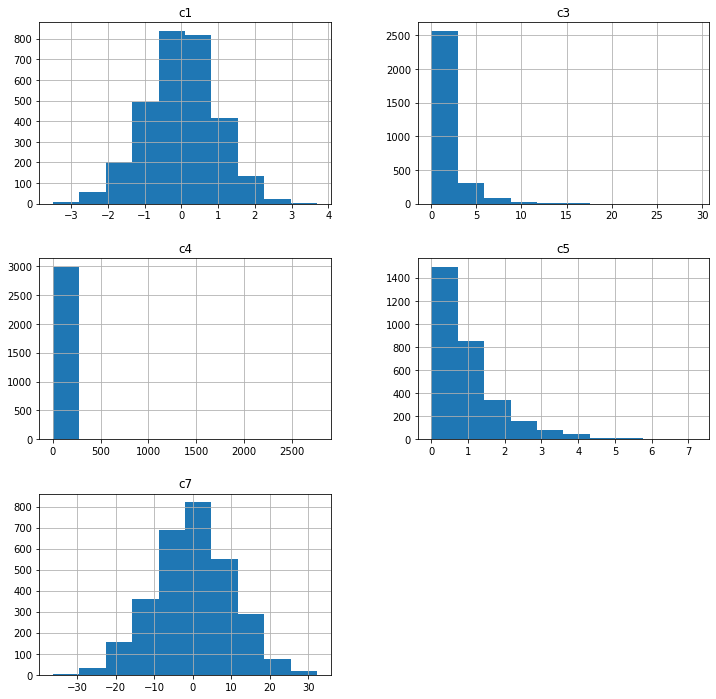

In [88]:
#6. Plot histograms for each remaining column
df.hist(bins=10, figsize=(12,12));

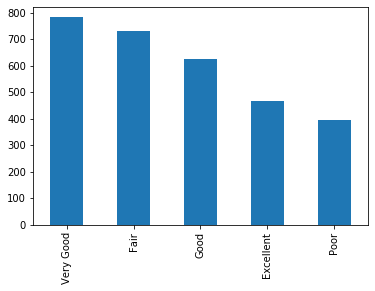

In [92]:
#plot categorical
df.iloc[:, -1].value_counts().plot(kind='bar');